<h1 style="margin-left:25%; font-style:bold; font-size:40px;"> Cash Flow - Analysis </h1>

<center><img alt="Insight logo" src="https://s3.amazonaws.com/mentoring.redesign/s3fs-public/GettyImages-1179202814.jpg" align="center" hspace="10px" vspace="10px" width="1000" height="1100" ></center>

<h1 style=" font-size:35px; text-decoration:underline;"> Introduction </h1>

<hr style="width:50%; height:1px; background-color:brown">

<h1 style=" font-size:33px;"> About - Project: </h1>

<p style="font-size:20px;">
    This Exploratory data analysis project is part of the requirements to satisfy the student industrial training program. In this analysis, we will be asking the <span style=";color:brown"> what</span>,<span style="color:brown"> how</span>, <span style="color:brown"> where</span> and <span style="color:brown"> why </span> questions, in other words, we will be looking for trends.
This analysis will be performed using "python", and we shall display/visualize correlations or relationships using it's(python's) "matplotlib" and "seaborn" libraries.
    </p>

<h1 style=" font-size:33px;"> About - Dataset: </h1>

<p style="font-size:20px;">
    This is an organization-wide cash flow dataset, which covers <span style="color:brown"> 12 Points</span> of the organization. The Cash flow data are collected from <span style="color:brown"> 6th of december 2021 </span>to <span style="color:brown"> 6th of may 2022 </span> using a location-garnering web application, or what some may refer to as an API(application programming interface). This web application which is hosted locally, gathers information and actively returns accurate data of each location/point. This dataset contains <span style="color:brown"> 8 Columns </span> and <span style="color:brown"> 1705 rows </span>, it's features include: <span style="color:brown"> name of location </span>,<span style="color:brown"> date of shift</span>,<span style="color:brown"> means of payment </span>,<span style="color:brown"> amount realised</span> and <span style="color:brown"> receipt count </span>. we will be discussing more about this dataset in the sections below.
    </p>

<hr style="width:50%; height:1px; background-color:black">

<h2 style="margin-left:50px;font-size:40px;font-family:Yu Mincho Demibold;color:brown">Basic <span style="color:black">Questions</span>

<ul style="list-style-type:circle;font-size:20px;">
    <li> <span style="color:black">How much was realised from each location within this period?</span></li>
    <li> <span style="color:black">How much was realised by the organization within this period?</span></li>
    <li> <span style="color:black">How often were the different payment methods used, and what is the ratio/percentage?</span> </li>
    <li> <span style="color:black">How much does realised amount vary between locations? </span></li>
     <li> <span style="color:black">Does the realised amount depend on the location? Is there any correlation? </span></li>
        <li> <span style="color:black">How much was realised between december and january, and does the festive period impact amount realised?</span></li> 
and more...

</ul>
</h2>

<p style="font-size:20px;color:black"> Let's get started!</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

import seaborn as sns

import jovian
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
cash_df = pd.read_excel('HSL.xlsx', na_values=['?'])

<p style="font-size:25px;color:brown"> Data at a glance:</p>

In [3]:
df = cash_df

In [4]:
cash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Location      1629 non-null   object 
 1   ShiftDate     1627 non-null   object 
 2   Cash          1627 non-null   float64
 3   Cheque        1627 non-null   float64
 4   POS           1627 non-null   float64
 5   MobileMoney   1627 non-null   float64
 6   TotalAmount   1627 non-null   float64
 7   ReceiptCount  1627 non-null   float64
dtypes: float64(6), object(2)
memory usage: 106.7+ KB


In [5]:
cash_df.describe()

,Cash,Cheque,POS,MobileMoney,TotalAmount,ReceiptCount
count,1.627000e+03,1627.000000,1627.000000,1627.0,1.627000e+03,1627.000000
mean,2.063525e+05,878.103258,3605.605058,0.0,2.108362e+05,52.151199
std,2.491053e+05,25139.635517,30837.078592,0.0,2.557110e+05,46.616799
min,2.000000e+02,0.000000,0.000000,0.0,2.000000e+02,1.000000
25%,4.268646e+04,0.000000,0.000000,0.0,4.285855e+04,16.000000
50%,1.029448e+05,0.000000,0.000000,0.0,1.048072e+05,32.000000
75%,2.851495e+05,0.000000,0.000000,0.0,2.890657e+05,82.000000
max,2.597121e+06,778888.900000,676733.060000,0.0,2.597121e+06,227.000000


In [6]:
cash_df['Location'].unique()

array(['point 1', ' point 1', ' point 2', ' point 3', ' point 4',
       ' point 5', ' point 6', ' point 7', ' point 8', ' point 9',
       ' point/pharmacy', 'HIsto/MORT \nPOINT', ' point 10',
       'HEART 2 HEART \nPOINT', nan, 'HIstoPATHOLOGY /\nMORTUARY',
       'HIsto/MORT ', 'POINT', 'ACCIDENT & EMERGENCY\nPHARMACY',
       'GOPD  POINT 3'], dtype=object)

<p style="font-size:25px;color:brown"> Data preparation and cleaning:</p>

In [7]:
#shuffling the dataframe

df = df.sample(frac=1)

In [8]:
df= df.dropna(axis=0)


In [9]:
df.loc[df['Location']=='POINT']

,Location,ShiftDate,Cash,Cheque,POS,MobileMoney,TotalAmount,ReceiptCount


In [10]:
df.Location.unique()

array([' point 9', ' point 6', ' point 5', ' point 1', ' point 8',
       'HIsto/MORT \nPOINT', ' point 7', ' point 10',
       'HEART 2 HEART \nPOINT', ' point 4', ' point 2', ' point 3',
       'GOPD  POINT 3', 'HIsto/MORT ', 'HIstoPATHOLOGY /\nMORTUARY',
       'ACCIDENT & EMERGENCY\nPHARMACY', ' point/pharmacy', 'point 1'],
      dtype=object)

In [37]:
cash_df['ShiftDate']=pd.to_datetime(cash_df['ShiftDate'], infer_datetime_format=True)

In [12]:
cash_df['ShiftDate']

0      2021-06-12
1      2021-06-12
2      2021-06-12
3      2021-06-12
4      2021-06-12
          ...    
1700   2022-06-05
1701   2022-06-05
1702   2022-06-05
1703   2022-06-05
1704   2022-06-05
Name: ShiftDate, Length: 1705, dtype: datetime64[ns]

<p style="font-size:25px;color:brown">Exploratory data analysis:</p>

In [13]:
df[['Location', 'TotalAmount']]

,Location,TotalAmount
835,point 9,3445.00
40,point 6,45460.00
19,point 5,260000.00
668,point 1,253753.80
1025,point 1,153352.00
...,...,...
377,point 7,66697.84
976,point 8,25514.39
292,point 1,51467.00
949,point 1,55116.00


In [14]:
import matplotlib
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(9,5)
matplotlib.rcParams['figure.facecolor']= '#00000000'

In [15]:
t_sum = df['TotalAmount'].sum()
t_mean = df['TotalAmount'].mean()
t_sum

343030441.28000003

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  teal">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>1. The total amount realised within this period was <span style="font-weight: bold; color:black;">343,030,441.28(Three hundred and 43 million, three hundred and four thousand, fourty one naira, twenty eight kobo.)</span>
<br>
</div>

In [16]:
loc_pie=df['Location'].value_counts()
loc_pie

 point 1                          600
 point 4                          108
 point 5                          106
 point 2                          106
 point 7                          104
 point 10                         101
 point 6                           91
 point 8                           91
 point 9                           83
HEART 2 HEART \nPOINT              77
 point 3                           75
HIsto/MORT \nPOINT                 41
GOPD  POINT 3                      35
 point/pharmacy                     3
HIsto/MORT                          2
ACCIDENT & EMERGENCY\nPHARMACY      2
HIstoPATHOLOGY /\nMORTUARY          1
point 1                             1
Name: Location, dtype: int64

In [17]:
loc_bar= df['Location'].value_counts().reset_index().head(10)
loc_bar

,index,Location
0,point 1,600
1,point 4,108
2,point 5,106
3,point 2,106
4,point 7,104
5,point 10,101
6,point 6,91
7,point 8,91
8,point 9,83
9,HEART 2 HEART \nPOINT,77


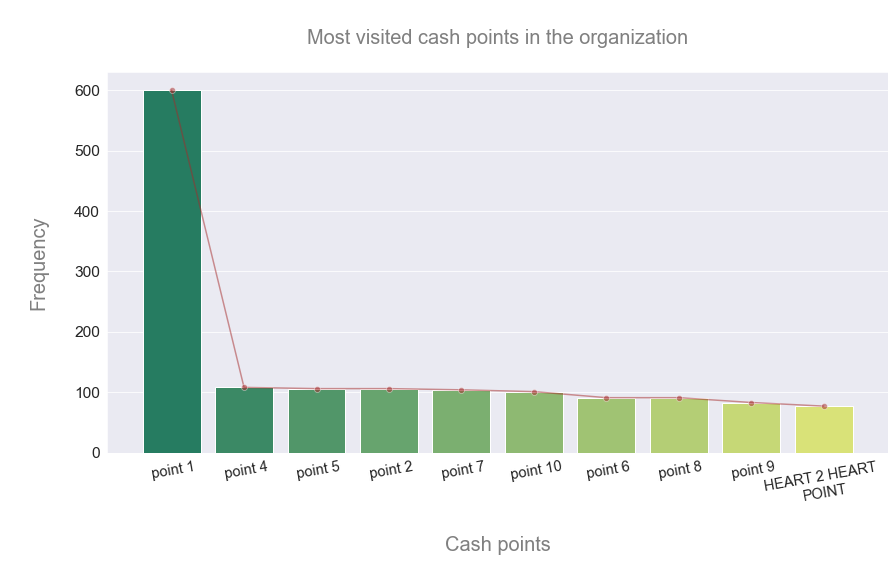

In [18]:
plt.figure(figsize=(14,7));
ax=sns.barplot(y=loc_bar['Location'], x=loc_bar['index'], palette='summer');
sns.lineplot(data = loc_bar, marker='o', x='index', y='Location', color = 'brown', alpha = .5);

ax.tick_params(axis='y', which='major', labelsize=15.6);
ax.tick_params(axis='x', which='major', labelsize=14.6, rotation=10);

plt.title('\nMost visited cash points in the organization\n', size=20, color='grey');

ax.set_xlabel('\nCash points\n', fontsize=20, color='grey');
ax.set_ylabel('\nFrequency\n', fontsize=20, color='grey');


<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  teal">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>2. <span style="font-weight: bold; color:black;">Point 1</span> was the most visited within this period with <span style="font-weight: bold; color:black;">600</span> visitations.</li>
<br>
    <li>3. <span style="font-weight: bold; color:black;">HEART 2 HEART POINT</span> was the least visited within this period with a little below <span style="font-weight: bold; color:black;">100</span> visitations.</li>
<br>
    </ul>
</div>

In [19]:
sum_df = df.groupby('Location')[['TotalAmount']].sum()
sums_df=sum_df.sort_values('TotalAmount', ascending= False).head(10).reset_index()
sums_df

,Location,TotalAmount
0,point 1,1.539359e+08
1,point 2,6.574514e+07
2,point 10,4.513262e+07
3,point 5,1.750260e+07
4,point 3,1.222921e+07
5,point 9,1.144492e+07
6,point 4,8.282338e+06
7,GOPD POINT 3,6.809917e+06
8,point 7,6.648042e+06
9,point 8,6.584576e+06


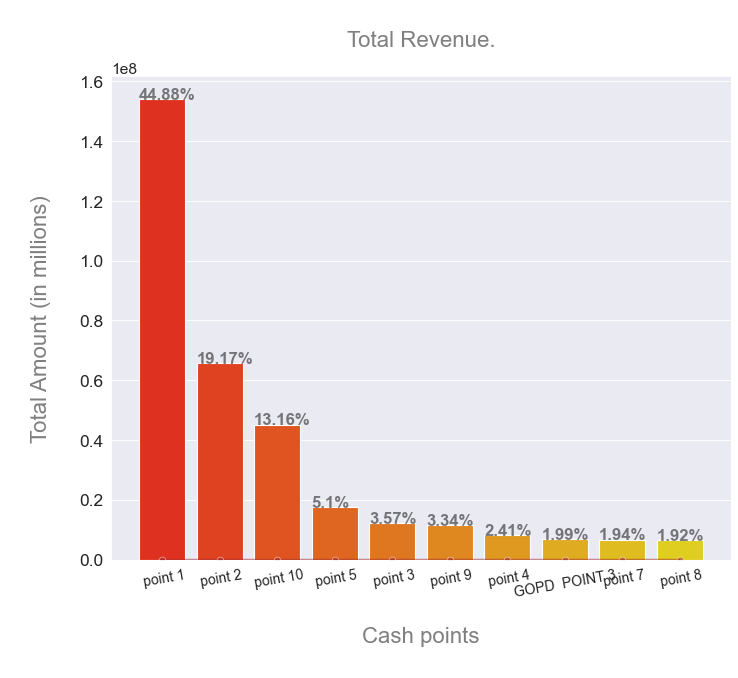

In [20]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 80)

ax=sns.barplot(x=sums_df['Location'], y=sums_df['TotalAmount'], palette='autumn');
sns.lineplot(data = loc_bar, marker='o', x='index', y='Location', color = 'brown', alpha = .5);

ax.tick_params(axis='y', which='major', labelsize=15.6);
ax.tick_params(axis='x', which='major', labelsize=12.6, rotation=10);

plt.title('\nTotal Revenue.\n', size=20, color='grey');

total = sums_df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.0, i.get_height()-10000, \
            str(round((i.get_height()/t_sum)*100, 2))+'%', fontsize=15,weight='bold',
                color='black', alpha=0.5)

ax.set_xlabel('\nCash points\n', fontsize=20, color='grey');
ax.set_ylabel('\nTotal Amount (in millions)\n', fontsize=20, color='grey');

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  teal">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>4. <span style="font-weight: bold; color:black;"> Point 1</span> had <span style="font-weight: bold; color:black;">44.88%</span> of all the revenue that was generated within these period, with over <span style="font-weight: bold; color:black;">100,000,000</span>.</li> million naira.
<br><br>
    <li>5. The top three points that generate revenue, can be seen to be <span style="font-weight: bold; color:black;"> point 1</span>,<span style="font-weight: bold; color:black;"> point 2</span> and <span style="font-weight: bold; color:black;"> point 10</span>.</li>
<br>
    </ul>
</div>

In [21]:
mean_df = df.groupby('Location')[['TotalAmount']].mean()
means_df = mean_df.sort_values('TotalAmount', ascending= False).head(10).reset_index()
means_df

,Location,TotalAmount
0,point 2,620237.123208
1,point 10,446857.664851
2,point 1,256559.834233
3,GOPD POINT 3,194569.046286
4,point 5,165118.867925
5,point 3,163056.194800
6,point 9,137890.638193
7,point 4,76688.310185
8,point 8,72357.983297
9,point 6,64594.580769


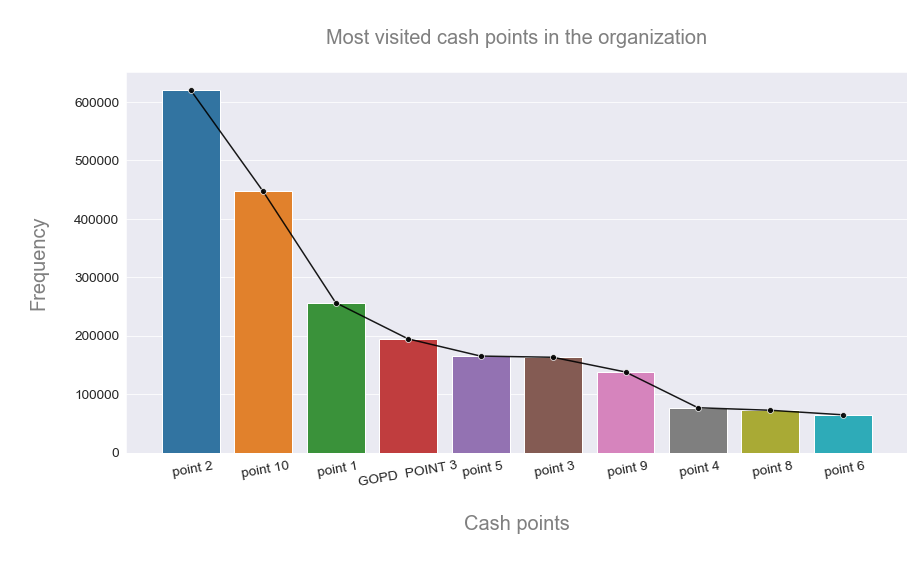

In [22]:
plt.figure(figsize=(14,7));
ax=sns.barplot(x=means_df['Location'], y=means_df['TotalAmount'],);
sns.lineplot(data = means_df, marker='o', x='Location', y='TotalAmount', color = 'black', alpha = .9);

ax.tick_params(axis='y', which='major', labelsize=13.6);
ax.tick_params(axis='x', which='major', labelsize=13.6, rotation=10);

plt.title('\nMost visited cash points in the organization\n', size=20, color='grey');

ax.set_xlabel('\nCash points\n', fontsize=20, color='grey');
ax.set_ylabel('\nFrequency\n', fontsize=20, color='grey');

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  teal">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>6. On Average, <span style="font-weight: bold; color:black;">point 2</span> generated more money, while <span style="font-weight: bold; color:black;">point 6</span> is in the last position among the top 10.</li>
<br>
</ul>
</div>

In [23]:
df.head()

,Location,ShiftDate,Cash,Cheque,POS,MobileMoney,TotalAmount,ReceiptCount
835,point 9,17/2/2022,3445.0,0.0,0.0,0.0,3445.0,2.0
40,point 6,8/12/2021,45460.0,0.0,0.0,0.0,45460.0,8.0
19,point 5,7/12/2021,260000.0,0.0,0.0,0.0,260000.0,73.0
668,point 1,4/2/2022,253753.8,0.0,0.0,0.0,253753.8,133.0
1025,point 1,4/3/2022,153352.0,0.0,0.0,0.0,153352.0,26.0


In [24]:
df['ShiftDate']=pd.to_datetime(df['ShiftDate'], infer_datetime_format=True)

In [25]:
df['ShiftDate'] = pd.to_datetime(df['ShiftDate'] , format = '%d-%m-%Y')
df

,Location,ShiftDate,Cash,Cheque,POS,MobileMoney,TotalAmount,ReceiptCount
835,point 9,2022-02-17,3445.00,0.0,0.0,0.0,3445.00,2.0
40,point 6,2021-12-08,45460.00,0.0,0.0,0.0,45460.00,8.0
19,point 5,2021-12-07,260000.00,0.0,0.0,0.0,260000.00,73.0
668,point 1,2022-02-04,253753.80,0.0,0.0,0.0,253753.80,133.0
1025,point 1,2022-03-04,153352.00,0.0,0.0,0.0,153352.00,26.0
...,...,...,...,...,...,...,...,...
377,point 7,2022-01-10,66697.84,0.0,0.0,0.0,66697.84,48.0
976,point 8,2022-03-01,25514.39,0.0,0.0,0.0,25514.39,12.0
292,point 1,2022-01-02,51467.00,0.0,0.0,0.0,51467.00,32.0
949,point 1,2022-02-28,55116.00,0.0,0.0,0.0,55116.00,32.0


In [26]:
df['month'] = pd.DatetimeIndex(df.ShiftDate).month
df['day'] = pd.DatetimeIndex(df.ShiftDate).day
df['weekday'] = pd.DatetimeIndex(df.ShiftDate).weekday
df

,Location,ShiftDate,Cash,Cheque,POS,MobileMoney,TotalAmount,ReceiptCount,month,day,weekday
835,point 9,2022-02-17,3445.00,0.0,0.0,0.0,3445.00,2.0,2,17,3
40,point 6,2021-12-08,45460.00,0.0,0.0,0.0,45460.00,8.0,12,8,2
19,point 5,2021-12-07,260000.00,0.0,0.0,0.0,260000.00,73.0,12,7,1
668,point 1,2022-02-04,253753.80,0.0,0.0,0.0,253753.80,133.0,2,4,4
1025,point 1,2022-03-04,153352.00,0.0,0.0,0.0,153352.00,26.0,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...
377,point 7,2022-01-10,66697.84,0.0,0.0,0.0,66697.84,48.0,1,10,0
976,point 8,2022-03-01,25514.39,0.0,0.0,0.0,25514.39,12.0,3,1,1
292,point 1,2022-01-02,51467.00,0.0,0.0,0.0,51467.00,32.0,1,2,6
949,point 1,2022-02-28,55116.00,0.0,0.0,0.0,55116.00,32.0,2,28,0


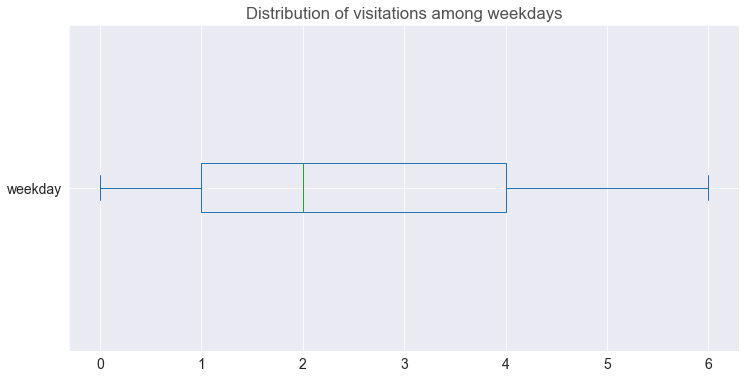

In [27]:
df['weekday'].plot(kind='box', figsize = (12,6), vert = False);
plt.title('Distribution of visitations among weekdays', alpha=0.8);

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  teal">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>7. From the above box plot, we can see that values are dense on days <span style="font-weight: bold; color:black;">1 (monday)</span> to <span style="font-weight: bold; color:black;">4 (thursday)</span>, meaning that there are more visitations on these days.</li>
<br>
</ul>
</div>

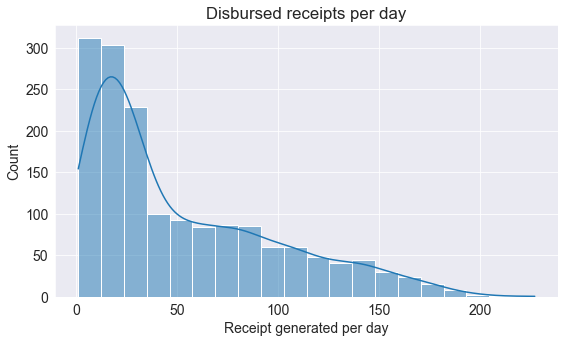

In [28]:
sns.histplot(x=df['ReceiptCount'], bins=20, kde=True,palette='spring');
plt.xlabel('Receipt generated per day');
plt.title('Disbursed receipts per day');

In [29]:
d_amount = df[(df['month']== 1) & (df['TotalAmount'])]
d_amount=d_amount[['Location','TotalAmount']].sum()

de_amount = df[(df['month']== 12) & (df['TotalAmount'])]
de_amount = de_amount[['Location','TotalAmount']].sum()

In [32]:
receipt = df['ReceiptCount'].sum()
re =receipt/days

# 471.3888888888889
# 84850.0

In [33]:
days = 180
t_d = t_sum/days
t_d/re
# 1905724.6737777777

4042.7865796110787

In [ ]:
jandecperc = (jandec/t_sum)*100
jandec = d_amount+de_amount
jandec = jandec['TotalAmount']
jandec,jandecperc

# (103887926.82000001, 30.285337485602646

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  teal">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>8. <span style="font-weight: bold; color:black;">471</span> reciepts are printed on the average daily.</li>
<br>
    <li>9. On the average, <span style="font-weight: bold; color:black;">1,905,724.67 (one million, nine hundred and five thousand, seven hundred and twenty four naira, 67 kobo)</span> was realised daily, and for each printed receipt comes <span style="font-weight: bold; color:black;">4,042.78(four thousand, fourty two naira, 78 kobo)</span>.</li>
<br>
    <li>10. <span style="font-weight: bold; color:black;">103,887,926.82 (one hundred and three million, eight hundred and eighty seven thousand, nine hundred and twenty six naira, eighty two kobo</span> in revenue, was generated between december 2021 and january 2022, with a percentage of <span style="font-weight: bold; color:black;">30.3</span>. </li>
<br>
</ul>
</div>

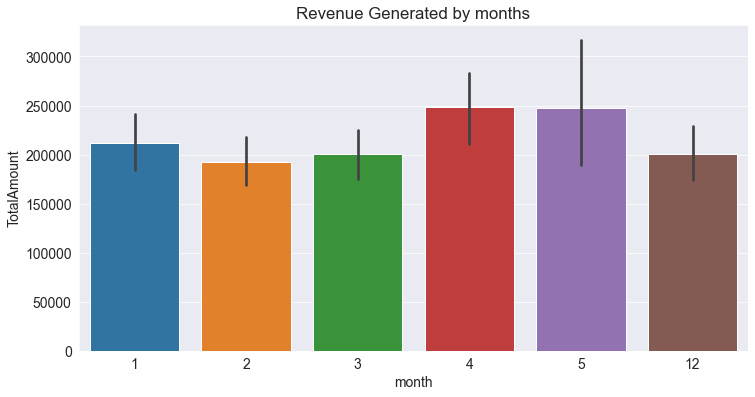

In [36]:
plt.figure(figsize=(12,6));
ax= sns.barplot(x=df['month'], y=df['TotalAmount'],);
plt.title('Revenue Generated by months');

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  teal">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>11. From the above bar plot, more revenue was generated in the month of <span style="font-weight: bold; color:black;">May</span>, and less was generated in the month of <span style="font-weight: bold; color:black;">August</span>.</li>
<br>
</ul>
</div>

<h1 style=" font-size:35px; text-decoration:underline;"> Conclusion </h1>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=14dpaeXX-ajsM8quwe3dCCdQdrdvf29iI" align="left" hspace="20px" vspace="20px" width="45" height="60" ></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  teal">All Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>1. The total amount realised within this period was <span style="font-weight: bold; color:black;">343,030,441.28(Three hundred and 43 million, three hundred and four thousand, fourty one naira, twenty eight kobo.)</span>
<br>
  <li>2. <span style="font-weight: bold; color:black;">Point 1</span> was the most visited within this period with <span style="font-weight: bold; color:black;">600</span> visitations.</li>
<br>
    <li>3. <span style="font-weight: bold; color:black;">HEART 2 HEART POINT</span> was the least visited within this period with a little below <span style="font-weight: bold; color:black;">100</span> visitations.</li>
<br>  
    <li>4. <span style="font-weight: bold; color:black;"> Point 1</span> had <span style="font-weight: bold; color:black;">44.88%</span> of all the revenue that was generated within these period, with over <span style="font-weight: bold; color:black;">100,000,000</span>.</li> million naira.
<br><br>
    <li>5. The top three points that generate revenue, can be seen to be <span style="font-weight: bold; color:black;"> point 1</span>,<span style="font-weight: bold; color:black;"> point 2</span> and <span style="font-weight: bold; color:black;"> point 10</span>.</li>
<br>
    <li>6. On Average, <span style="font-weight: bold; color:black;">point 2</span> generated more money, while <span style="font-weight: bold; color:black;">point 6</span> is in the last position among the top 10.</li>
<br>
    <li>7. From the above box plot, we can see that values are dense on days <span style="font-weight: bold; color:black;">1 (monday)</span> to <span style="font-weight: bold; color:black;">4 (thursday)</span>, meaning that there are more visitations on these days.</li>
<br>
   <li>8. <span style="font-weight: bold; color:black;">471</span> reciepts are printed on the average daily.</li>
<br>
    <li>9. On the average, <span style="font-weight: bold; color:black;">1,905,724.67 (one million, nine hundred and five thousand, seven hundred and twenty four naira, 67 kobo)</span> was realised daily, and for each printed receipt comes <span style="font-weight: bold; color:black;">4,042.78(four thousand, fourty two naira, 78 kobo)</span>.</li>
<br>
    <li>10. <span style="font-weight: bold; color:black;">103,887,926.82 (one hundred and three million, eight hundred and eighty seven thousand, nine hundred and twenty six naira, eighty two kobo</span> in revenue, was generated between december 2021 and january 2022, with a percentage of <span style="font-weight: bold; color:black;">30.3</span>. </li>
<br> 
    <li>11. From the above bar plot, more revenue was generated in the month of <span style="font-weight: bold; color:black;">May</span>, and less was generated in the month of <span style="font-weight: bold; color:black;">August</span>.</li>
<br>
</ul>
</div>

<h1 style=" font-size:30px;"> References </h1>

- `Stackoverflow`: https://stackoverflow.com/questions/68870547/date-and-time-conversion-in-python-pandas
- `opendatasets` Python library: https://github.com/JovianML/opendatasets
- `Pandas` user guide: https://pandas.pydata.org/docs/user_guide/index.html
- `Matplotlib` user guide: https://matplotlib.org/3.3.1/users/index.html
- `Seaborn` user guide & tutorial: https://seaborn.pydata.org/tutorial.html